In [5]:
# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score

# Get the Data

In [8]:
car_details = pd.read_csv(r"J:\Data Science\Projects\Linear Regression\Car Details\CAR DETAILS FROM CAR DEKHO.csv")

# Understand the Data

In [10]:
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [12]:
car_details.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [13]:
car_details.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [14]:
# Since we have no null values, imputing is not required

In [15]:
car_details.shape

(4340, 8)

In [16]:
car_details.duplicated().sum()

763

In [17]:
car_details[car_details.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [18]:
# Removing duplicates to avoid issues in model building

In [19]:
car_df = car_details.drop_duplicates()
car_df.duplicated().sum()
car_df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [20]:
print(car_details["fuel"].unique())
print(car_details["seller_type"].unique())
print(car_details["transmission"].unique())
print(car_details["owner"].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


# EDA

In [22]:
#Get the Brand Name

In [23]:
car_df["Brand"] = car_df['name'].str.split().str[0]

C:\Users\jaigo\AppData\Local\Temp\ipykernel_26388\331485052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df["Brand"] = car_df['name'].str.split().str[0]


In [24]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [25]:
car_df["Brand"].value_counts()

Brand
Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [26]:
# Maruti is the most resold car

In [27]:
car_df["fuel"].value_counts()

fuel
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64

In [28]:
# Most cars are diesel or petrol vehicles


In [29]:
car_df["owner"].value_counts()

owner
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64

In [30]:
# Major sellers are First owner

            Brand  selling_price
0            Land        3609800
1           Volvo        2556250
2   Mercedes-Benz        2299238
3             BMW        2242800
4            Audi        2185451
5          Jaguar        2072999
6              MG        1842500
7            Jeep        1530000
8           Isuzu        1500000
9             Kia        1300000
10     Mitsubishi         843000
11         Toyota         838917
12       Mahindra         584780
13           Ford         563627
14          Honda         539944
15          Skoda         475551
16     Volkswagen         461666
17         Nissan         457038
18        Hyundai         413340
19        Renault         408399
20          Force         346000
21         Maruti         332031
22         Datsun         296551
23           Fiat         287093
24           Tata         278672
25      Chevrolet         232713
26     Ambassador         200000
27      OpelCorsa          88500
28         Daewoo          60000


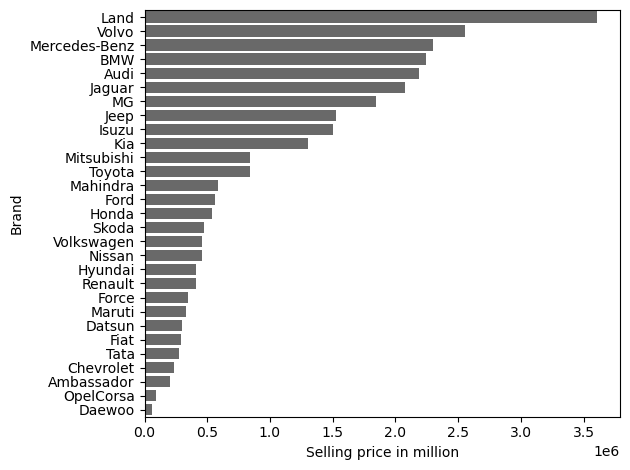

In [31]:
price = car_df.groupby("Brand")["selling_price"].mean()
price.sort_values(ascending=False, inplace=True)
price = price.reset_index()
price['selling_price'] = price['selling_price'].astype(int)
print(price)

sns.barplot(data = price, x = "selling_price", y = "Brand", color = "dimgray", dodge = True)
plt.xlabel("Selling price in million")
plt.tight_layout()
plt.show()

In [32]:
# Dropping electric car since it has only one data, it give issues in model training
car_df.drop(car_df[car_df['fuel'] == 'Electric'].index, inplace=True)

C:\Users\jaigo\AppData\Local\Temp\ipykernel_26388\2584818181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df.drop(car_df[car_df['fuel'] == 'Electric'].index, inplace=True)


# Feature Scaling

In [34]:
car_df["year"] = 2020 - car_df["year"]
car_df.rename(columns = {"year" : "age_of_the_car"}, inplace = True)

scale_standard = StandardScaler()
scaled_data = scale_standard.fit_transform(car_df[["age_of_the_car", "selling_price", "km_driven"]])
car_df_standardized = pd.DataFrame(scaled_data, columns = ["age_of_the_car", "selling_price", "km_driven"])
car_df.drop(["selling_price", "age_of_the_car", "km_driven", "name", "Brand"], axis = 1, inplace = True)


car_df.reset_index(drop=True, inplace=True)
car_df = pd.concat([car_df, car_df_standardized], axis = 1 )

C:\Users\jaigo\AppData\Local\Temp\ipykernel_26388\983745846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df["year"] = 2020 - car_df["year"]
C:\Users\jaigo\AppData\Local\Temp\ipykernel_26388\983745846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df.rename(columns = {"year" : "age_of_the_car"}, inplace = True)
C:\Users\jaigo\AppData\Local\Temp\ipykernel_26388\983745846.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [35]:
# Split our data
X = car_df.drop(["selling_price"], axis = 1)
y = car_df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [36]:
# Categorical Variables
categorical_vars = ["fuel", "seller_type", "transmission", "owner"]

one_hot_encoder = OneHotEncoder(sparse_output = False, drop = "first")  

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop = True), X_train_encoded.reset_index(drop = True)], axis = 1) 
X_train.drop(categorical_vars, axis = 1, inplace = True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop = True), X_test_encoded.reset_index(drop = True)], axis = 1) 
X_test.drop(categorical_vars, axis = 1, inplace = True)

# Feature Selection

Optimal number of features : 11


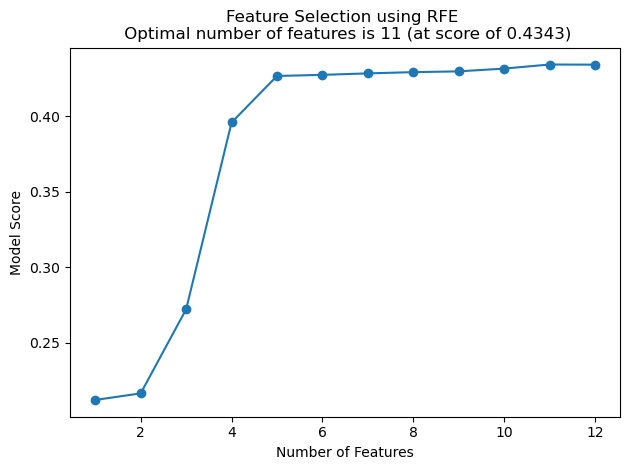

In [38]:
regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X_train,y_train)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features : {optimal_feature_count}")

X_train = X_train.loc[:, feature_selector.get_support()]  # This code is to select only object that is selected by feature selection algorithm
X_test = X_test.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.cv_results_['mean_test_score']) +1), fit.cv_results_['mean_test_score'], marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout()
plt.show()

# Model Training

In [40]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the test

y_pred = regressor.predict(X_test)

# calculate R-Squared

r_squared = r2_score(y_test, y_pred)
print(r_squared)

# Cross validation

cv = KFold(n_splits = 4, shuffle= True, random_state= 42)       # Updating no of folds and enabling shuffle
cv_scores = cross_val_score(regressor, X_train, y_train, cv = cv, scoring = "r2")
cv_scores.mean() 

# Calculate Adjusted R-Squared

num_data_points, num_input_vars = X_test.shape

adjusted_r_squared = 1 - (1 - r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars - 1)
print(adjusted_r_squared)

0.4294637780291656
0.4205491495608713


In [77]:
# Extract Model Coefficient
coefficients = pd.DataFrame(regressor.coef_)
input_variable_names = pd.DataFrame(X_train.columns)
summary_stats = pd.concat([input_variable_names, coefficients], axis = 1)
summary_stats.columns = ["input_variable", "coefficient"]
print(summary_stats)


                  input_variable  coefficient
0                 age_of_the_car    -0.282772
1                      km_driven    -0.062804
2                    fuel_Diesel     0.505632
3                       fuel_LPG     0.066459
4         seller_type_Individual    -0.069264
5   seller_type_Trustmark Dealer     0.182447
6            transmission_Manual    -1.516639
7     owner_Fourth & Above Owner    -0.076804
8             owner_Second Owner    -0.088476
9           owner_Test Drive Car     0.416469
10             owner_Third Owner    -0.112360


# The given data is cleaned and EDA was done.
# Feature scaling(StandardScaler) was done to the columns age_of_the_car, selling_price and km_driven.
# OneHotEncoder was used for the categorical variables and avoided dummy variable trap.
# Feature selection was done and the optimal number of features was taken into account.
# Got the r2 score and adjusted r2 score.

